In [1]:
#ask if wheel or speed
#check there are files to label
#connect to redis
#find next image to label
#check doesnt exist in redis
#show user image(s)
#ask user for label
#check within bounds
#submit to redis

In [2]:
import redis
import sys
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
redisAngle = redis.Redis(host='localhost', port=6379, db=1, decode_responses=True)
redisSpeed = redis.Redis(host='localhost', port=6379, db=2, decode_responses=True)

In [11]:
def WheelLabel():
    label = input('What Angle?  ')
    if label == 's':
        return 'skip'
    if label.isnumeric():
        if int(label) > 0 and int(label) < 180:
            return label
        else:
            print("Out of bounds, must be between 0 and 180. Press 's' to skip")
            return WheelLabel()
    else:
        print("Must be interger between 0 and 180, press 's' to skip")
        return WheelLabel()

def WheelLabeler(path):
    print('Loading Wheel Angle Labeler')
    
    exist = os.path.exists(path)
    if exist:
        print('Directory Exists')
    else:
        print('Directory Does Not Exists')
        sys.exit()
    
    directory = os.fsencode(path+'/Original/')
    
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        if filename.endswith(".jpg"):            
            img = mpimg.imread(path + '/Angle/' + filename)
            imgplot = plt.imshow(img)
            plt.show()
            
            label = WheelLabel()
            if label != 's':
                redisAngle.set(filename, label)
                print(label + ' Degrees')
            else:
                print('Skipped')

In [12]:
def SpeedLabel():
    label = input('What Speed?  ')
    if label == 's':
        return 'skip'
    if label.isnumeric():
        if int(label) > 0 and int(label) < 100:
            return label
        else:
            print("Out of bounds, must be between 0 and 100. Press 's' to skip")
            return SpeedLabel()
    else:
        print("Must be interger between 0 and 100, press 's' to skip")
        return SpeedLabel()

def SpeedLabeler(path):
    print('Loading Speed Labeler')
    
    exist = os.path.exists(path)
    if exist:
        print('Directory Exists')
    else:
        print('Directory Does Not Exists')
        sys.exit()
    
    directory = os.fsencode(path)
    
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        if filename.endswith(".jpg"):
            img = mpimg.imread(path + filename)
            imgplot = plt.imshow(img)
            plt.show()
            
            label = SpeedLabel()
            if label != 's':
                redisSpeed.set(filename, label)
                print(label + ' Degrees')
            else:
                print('Skipped')
            

In [13]:
def run():
    i = input("Type 'w' for wheel, 's' for speed or 'x' for exit: ")
    
    if(i == 's'):
        SpeedLabeler('SpeedLabel')
        
    elif(i == 'w'):
        WheelLabeler('WheelAngleLabel')
        
    elif(i == 'x'):
        print('Exiting Labeler')
        sys.exit()
        
    else:
        print('Not a valid input')
        startingInput()

Type 'w' for wheel, 's' for speed or 'x' for exit: w
Loading Wheel Angle Labeler
Directory Exists


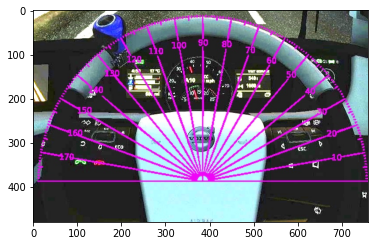

What Angle?  15
15 Degrees


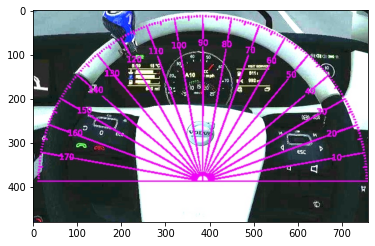

What Angle?  55
55 Degrees


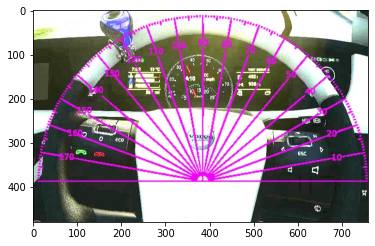

What Angle?  55
55 Degrees


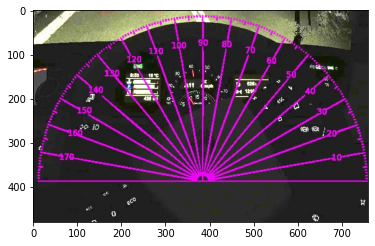

What Angle?  55
55 Degrees


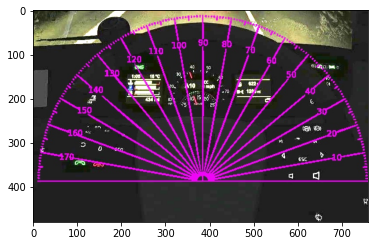

What Angle?  55
55 Degrees


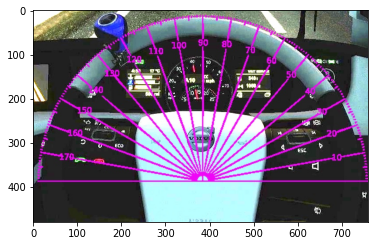

What Angle?  55
55 Degrees


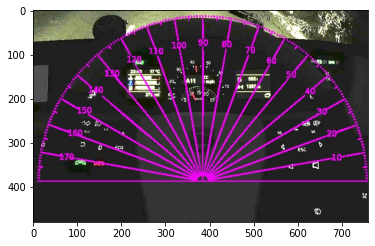

What Angle?  w
Must be interger between 0 and 180
What Angle?  w
Must be interger between 0 and 180
What Angle?  w
Must be interger between 0 and 180
What Angle?  fdf
Must be interger between 0 and 180
What Angle?  78
78 Degrees


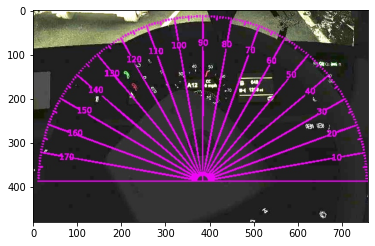

What Angle?  414
Out of bounds, must be between 0 and 180
What Angle?  -8
Must be interger between 0 and 180
What Angle?  50
50 Degrees


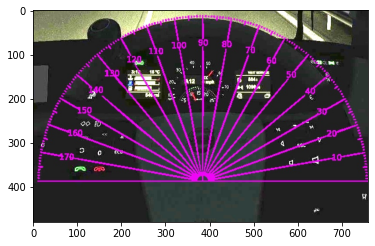

What Angle?  95
95 Degrees


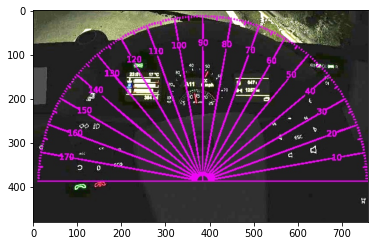

What Angle?  100
100 Degrees


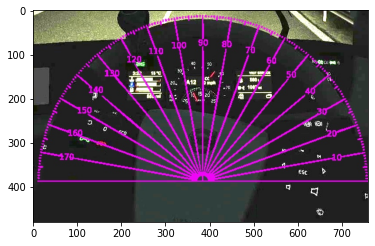

What Angle?  80
80 Degrees


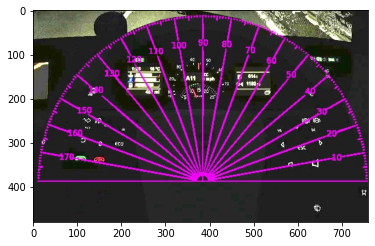

What Angle?  90
90 Degrees


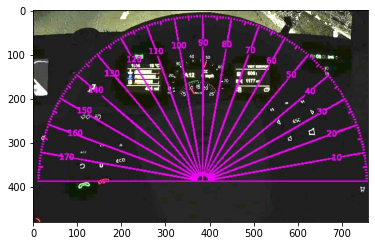

What Angle?  97
97 Degrees


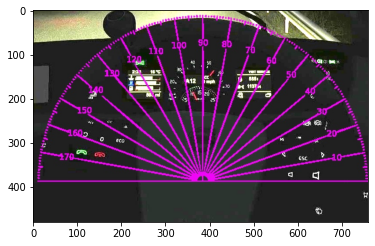

What Angle?  87
87 Degrees


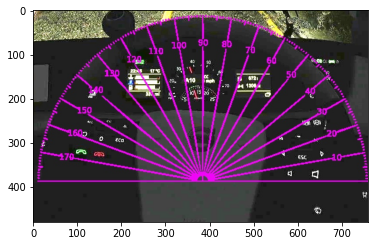

In [ ]:
i = ''


run()

In [ ]:
Labeler.py